# Big Data Real-Time Analytics with Python and Spark

## Chapter 15 - Spark Streaming - Part 1

### Mini project 5 - Real-time IoT sensor data analysis with apache spark streaming and apache kafka

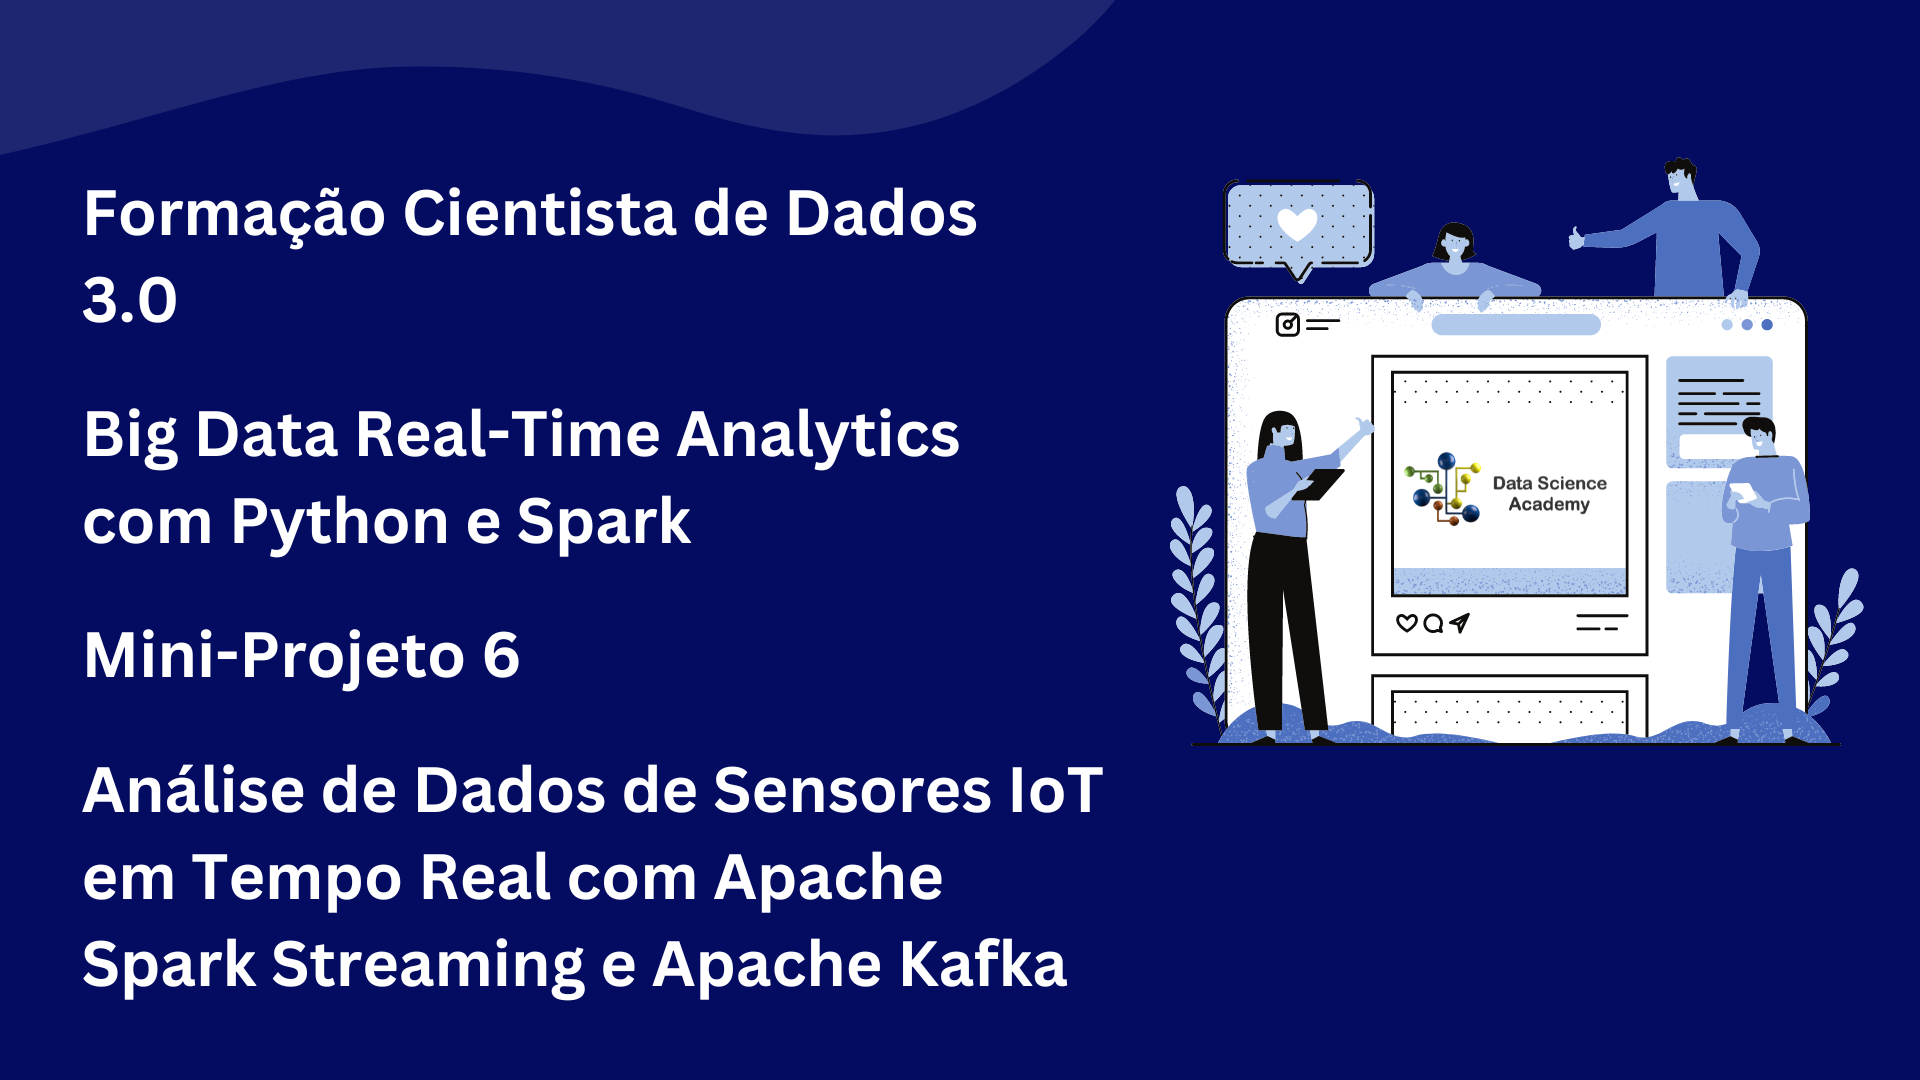

In [1]:
# Python version
from platform import python_version
print('The version of python used in this notebook is: ', python_version())

The version of python used in this notebook is:  3.8.13


In [2]:
# Import findspark and inicialize it
import findspark
findspark.init()

In [3]:
# Imports
import pyspark
from pyspark.streaming import StreamingContext
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructField, StringType, DoubleType
from pyspark.sql.functions import col, from_json

> We need to include the Spark Streaming integration connector with Apache Kafka

https://spark.apache.org/docs/latest/structured-streaming-kafka-integration.html

In [9]:
# Conector
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-sql-kafka-0-10_2.12:3.3.1 pyspark-shell'

In [7]:
# Package versions used in this notebook
%reload_ext watermark
%watermark -a 'Bianca Amorim' --iversions

Author: Bianca Amorim

findspark: 2.0.1
pyspark  : 3.3.1



## Creating Spark Session

In [8]:
spark = SparkSession.builder.appName('Mini-Project6').getOrCreate()

22/12/29 16:01:15 WARN Utils: Your hostname, Avell resolves to a loopback address: 127.0.1.1; using 192.168.1.81 instead (on interface wlo1)
22/12/29 16:01:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
:: loading settings :: url = jar:file:/home/bia/anaconda3/lib/python3.8/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/bia/.ivy2/cache
The jars for the packages stored in: /home/bia/.ivy2/jars
org.apache.spark#spark-sql-kafka-0-10_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-d6b36e0b-db36-419e-81e1-6b851de7497a;1.0
	confs: [default]
	found org.apache.spark#spark-sql-kafka-0-10_2.12;3.3.1 in central
	found org.apache.spark#spark-token-provider-kafka-0-10_2.12;3.3.1 in central
	found org.apache.kafka#kafka-clients;2.8.1 in central
	found org.lz4#lz4-java;1.8.0 in central
	found org.xerial.snappy#snappy-java;1.1.8.4 in central
	found org.slf4j#slf4j-api;1.7.32 in central
	found org.apache.hadoop#hadoop-client-runtime;3.3.2 in central
	found org.spark-project.spark#unused;1.0.0 in central
	found org.apache.hadoop#hadoop-client-api;3.3.2 in central
	found commons-logging#commons-logging;1.1.3 in central
	found com.google.code.findbugs#jsr305;3.0.0 in central
	found org.apache.commons#commons-pool2;2.11.1 in central
downloading h

22/12/29 16:01:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/29 16:01:30 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/12/29 16:01:30 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/12/29 16:01:30 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
22/12/29 16:01:30 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
22/12/29 16:01:30 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
22/12/29 16:01:30 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.


## Reading the Kafka Spark Structured Stream

In [15]:
# Let's create a subscription on the topic that has the data stream we want to 'pull'.
df = spark \
    .readStream \
    .format('kafka') \
    .option('kafka.bootstrap.servers', 'localhost:9092') \
    .option('subscribe', 'dsamp6') \
    .load()

## Definition of the Data Source Schema